In [1]:
import sys
import os

PACKAGE_PARENT = '../../../../'
sys.path.append(PACKAGE_PARENT)

from alphaslime.agents.RL.policygrad.torch.ppo import PPOAgent
from alphaslime.trainer.trainerSA import TrainerSA as Trainer
import ppo_training_configs as PPOCONFIGS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# create required directories if not present
PPOCONFIGS.create_dirs()

In [3]:
# load configurations
CONST = PPOCONFIGS.CONST
agent_config = PPOCONFIGS.agent_hyper
env = PPOCONFIGS.env
agent_training_configs = PPOCONFIGS.agent_training_configs

In [4]:
from alphaslime.trainer.datahelp.pg_agents import PGLearnFile

filenamer = PGLearnFile()

trainer = Trainer(CONSTANTS=CONST)

filenames = trainer.train(training_config=agent_training_configs, agent_config=agent_config, fileNamer=filenamer)

print(filenames)

Actor Device used: cpu
Critic Device used: cpu


 24%|██▍       | 238/1000 [03:27<19:49,  1.56s/it]


 Environment solved in 237 episodes!	Average Score: 476.40


100%|██████████| 1000/1000 [16:34<00:00,  1.01it/s]

['data_cart/gamma_0.99_alpha_0.0003_reward_450.9_model', 'data_cart/gamma_0.99_alpha_0.0003_reward_450.9_data.pkl', 'data_cart/gamma_0.99_alpha_0.0003_reward_450.9_agent_cfg.pkl', 'data_cart/gamma_0.99_alpha_0.0003_reward_450.9_train_cfg.pkl', 'data_cart/gamma_0.99_alpha_0.0003_reward_450.9_CONSTANTS.pkl']


In [7]:
import pickle
# load training data
temp = 'data/gamma_0.99_alpha_0.0003_reward_450.9_data.pkl'
temp = filenames [1]
training_data_path = temp
print(training_data_path)
with open(training_data_path, 'rb') as f:
    training_data = pickle.load(f)

data_cart/gamma_0.99_alpha_0.0003_reward_450.9_data.pkl


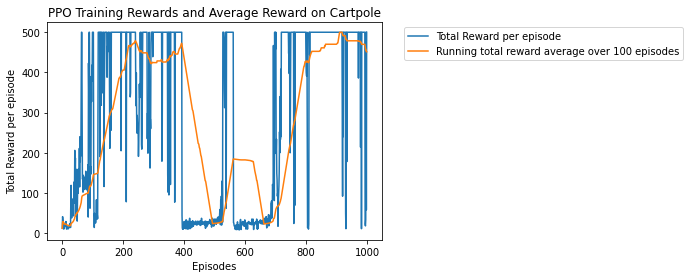

In [9]:
import alphaslime.utils.ploty as ploty
figure_file = PPOCONFIGS.base_plot_path + 'avg_rew_cartpolev1_ppo.png'
rewards = training_data['rewards']
title = 'PPO Training Rewards and Average Reward on Cartpole'
x = [i for i in range(len(rewards))]
rn_avg_len = PPOCONFIGS.running_avg_len
ploty.plot_learning_curve_plus_score(x,rewards, figure_file, running_avg_len=rn_avg_len, title=title)